# Import OSMNX and stuff

In [4]:
import osmnx as ox

In [ ]:
home, origin_point = ox.graph_from_address('601 Minnesota Street, San Francisco, California', 
                                           distance=10000, network_type='drive', return_coords=True)

## How's it look?

In [3]:
origin_point

(37.7642144, -122.3908315)

In [4]:
ox.get_nearest_node(home, origin_point, return_dist=True)

(65290899, 0.0)

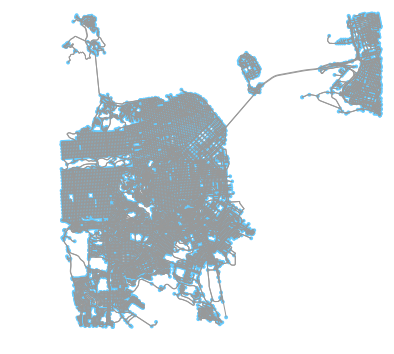

/Users/octavisemonin/anaconda3/envs/geo/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [5]:
G = home.copy()
# G = nyc.copy()
# G = sf.copy()

center_node = ox.get_nearest_node(G, origin_point)
G = ox.project_graph(G)
fig, ax = ox.plot_graph(G)
ax.scatter([G.node[center_node]['x']], [G.node[center_node]['y']],
           color='red', s=150, zorder=10)
fig.show()

### COOOOOOL.

### initialize edge traffic to 1, source node traffic to 1:

In [6]:
for u, v, k, data in G.edges(data=True, keys=True):
    data['through_traffic'] = 1
    
for node, data in G.nodes(data=True):
    data['source_traffic'] = 1
    data['transit_time'] = 0 # np.nan

## This does routing

In [42]:
import requests
import time

In [56]:
G.node()

NodeView((30362160, 30362888, 30363887, 30364111, 30364114, 30364616, 30364622, 30365438, 30365459, 30365826, 30365945, 30366047, 30366152, 30366153, 30366199, 30366200, 30372583, 30374146, 30374151, 32927555, 32927563, 32927591, 32927645, 33241803, 33242031, 35833157, 52978760, 52978761, 52978858, 52978880, 52979290, 52979342, 52979349, 52979749, 52979754, 52979758, 52982915, 52983587, 52983612, 52983639, 52984795, 52986721, 52989622, 52999218, 53003559, 53003570, 53003639, 53003773, 53003777, 53004835, 53005347, 53011243, 53011244, 53011307, 53011315, 53016876, 53016898, 53016907, 53018380, 53018382, 53021714, 53021715, 53021717, 53021719, 53024602, 53024603, 53024605, 53024607, 53026583, 53026585, 53026588, 53026590, 53027353, 53027354, 53027963, 53027964, 53028200, 53028202, 53028204, 53028206, 53028207, 53029088, 53030242, 53030244, 53030246, 53030248, 53030250, 53030270, 53030275, 53030277, 53030298, 53030319, 53030320, 53030321, 53030322, 53030325, 53030326, 53030328, 53030329, 

In [65]:
def osrm(origin_node, center_node, mode='driving'):
    start = '%f,%f' % (G.node[origin_node]['lon'],G.node[origin_node]['lat'])
    end = '%f,%f' % (G.node[center_node]['lon'],G.node[center_node]['lat'])
    
    for attempt in range(3):
        
        try:
            query = 'http://router.project-osrm.org/route/v1/%s/%s;%s?steps=true&annotations=true' % (mode,start,end)
            r = requests.get(query)

            route = r.json()['routes'][0]['legs'][0]['annotation']['nodes']
            transit_time = r.json()['routes'][0]['duration']
        except KeyError:
            print('Failed on node %s, retrying...' % origin_node)
            time.sleep(attempt + 1)
            continue
            
    return route,transit_time,r

In [87]:
route,time,r = osrm(5353921549, center_node)

In [85]:
center_node

65290899

In [86]:
time

531

In [69]:
len(route)

189

In [70]:
r.json()['routes'][0].keys()#['legs']

dict_keys(['geometry', 'legs', 'weight_name', 'weight', 'duration', 'distance'])

In [71]:
r.json()['routes'][0]['duration']

975.4

In [72]:
r.json().keys()

dict_keys(['routes', 'waypoints', 'code'])

In [73]:
sum(r.json()['routes'][0]['legs'][0]['annotation']['duration'])

955.6

In [82]:
len(route)

189

In [83]:
len(r.json()['routes'][0]['legs'][0]['annotation']['duration'])

189

In [77]:
r.json()['routes'][0]['legs']

[{'annotation': {'datasources': [7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    0,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7

# Run it on the whole graph!

In [2]:
from tqdm import tqdm
import networkx as nx

In [10]:
# For every node in the map...
missing_edges = set([])
missing_nodes = set([])

for origin_node in tqdm(G.nodes()):
    route,transit_time = osrm(origin_node, center_node, mode='driving')
    route = [node for node in route if node in list(G)]
    G.node[origin_node]['transit_time'] = transit_time
    
    # for that route, for every edge on the route, increment the through-traffic 
    #  count by the source traffic coming from the origin node..
    for i0, i1 in zip(route[:-1], route[1:]):
        try:
            G.edges[i0,i1,0]['through_traffic'] += G.node[origin_node]['source_traffic'] # new way
        except KeyError:
            missing_edges.update((i0, i1))
            continue

 68%|██████▊   | 8128/11883 [1:41:35<46:56,  1.33it/s]  

Failed on node 65466555, retrying...
Failed on node 65466555, retrying...


 90%|█████████ | 10696/11883 [2:17:37<15:16,  1.30it/s]

Failed on node 1712572394, retrying...


 99%|█████████▉| 11750/11883 [2:33:28<01:44,  1.28it/s]

Failed on node 4905084623, retrying...


 99%|█████████▉| 11751/11883 [2:33:30<01:43,  1.28it/s]

Failed on node 4909996358, retrying...


 99%|█████████▉| 11752/11883 [2:33:34<01:42,  1.28it/s]

Failed on node 4911186316, retrying...
Failed on node 4911186316, retrying...
Failed on node 4911186316, retrying...


UnboundLocalError: local variable 'route' referenced before assignment

# Show it!

In [9]:
import pickle
import numpy as np
import matplotlib.cm as cm
% matplotlib inline

In [10]:
with open('graphs/tavi-big.pickle', 'rb') as f:
    G, center_node = pickle.load(f)

In [31]:
# edge_intensity = np.log10(np.array([data['through_traffic'] for u, v, data in G.edges(data=True)]))
edge_intensity = np.log2(np.array([data['through_traffic'] for u, v, data in G.edges(data=True)]))
edge_widths = (edge_intensity / edge_intensity.max() ) * 3 #+ 1
edge_intensity = np.array([G.node[u]['transit_time'] + G.node[v]['transit_time'] for u,v in G.edges()])
edge_intensity = (edge_intensity / edge_intensity.max() ) * .95 + .05
edge_intensity = (255 - edge_intensity*255).astype(np.uint8)

cmap = cm.get_cmap(name='magma')
edge_colors = cmap(edge_intensity)

# node_colors = cmap(node_intensity)

C:\Users\tavis\AppData\Local\Continuum\anaconda3\envs\geo\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


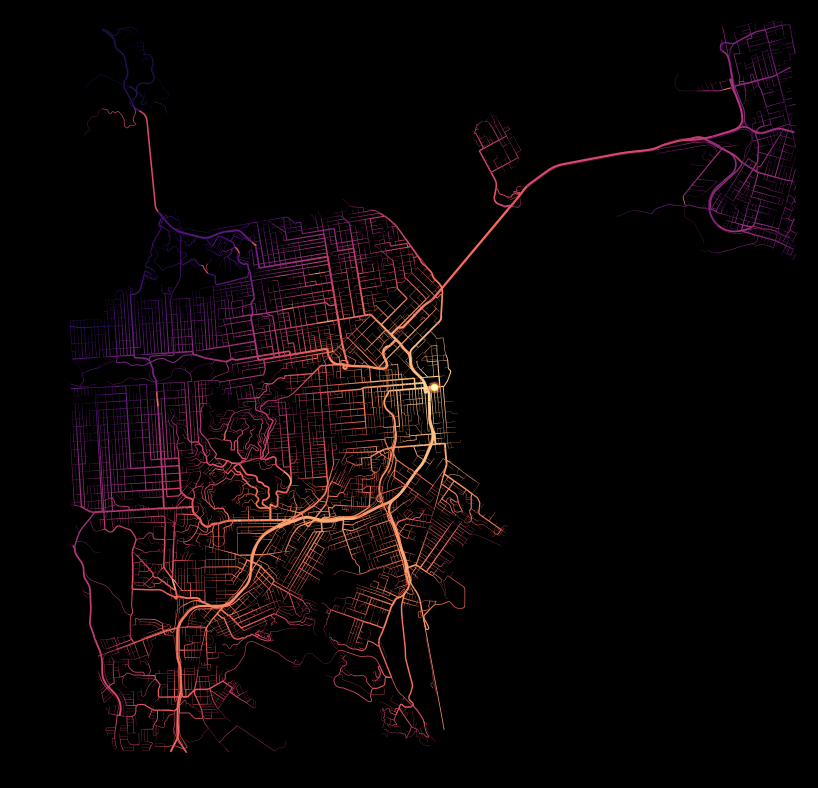

In [32]:
fig, ax = ox.plot_graph(G, edge_color=edge_colors, edge_linewidth=edge_widths, equal_aspect=True, node_size=0, 
                        save=True, fig_height=14, fig_width=16, use_geom=True , close=False, show=False,  bgcolor='k')

ax.scatter([G.node[center_node]['x']], [G.node[center_node]['y']],
           color='red', s=150, zorder=10, alpha=.25)
ax.scatter([G.node[center_node]['x']], [G.node[center_node]['y']],
           color='pink', s=100, zorder=10, alpha=.3)
ax.scatter([G.node[center_node]['x']], [G.node[center_node]['y']],
           color='yellow', s=50, zorder=10, alpha=.6)
ax.scatter([G.node[center_node]['x']], [G.node[center_node]['y']],
           color='white', s=30, zorder=10, alpha=.75)

# fig.savefig('test.png', facecolor=fig.get_facecolor(), dpi=300)
fig.show()

# Plot 3D

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import numpy as np

% matplotlib inline

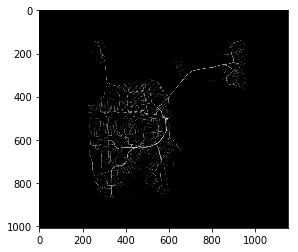

In [17]:
gray = np.mean(plt.imread('images/tavi.png'), -1)
plt.imshow(gray, cmap='gray')

In [18]:
r,c = gray.shape[:2]
X,Y = np.mgrid[0:r, 0:c]

In [19]:
from scipy.ndimage.filters import gaussian_filter

blurred = gaussian_filter(gray, sigma=4)

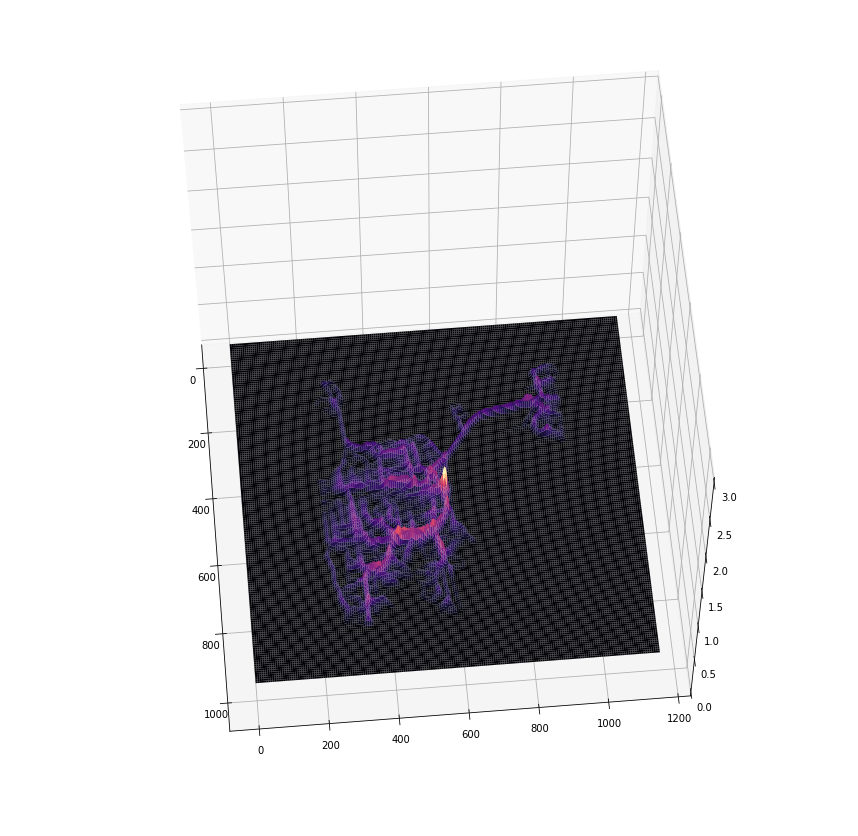

In [20]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, blurred, cmap=cm.get_cmap(name='magma'), rcount=200, ccount=200)
ax.set_zlim(0,3)
ax.view_init(elev=60, azim=-5)

# Things to try
- spatially uniform colormaps: such as inferno. done.
- logarithmic axes
    - switch to polar coordinates
- the map seems wrong, takes long detours? added "node penalty"
- map of PageRank?
- thin roads get drawn on top of fat roads

# Contour map, uses `transit_time`

In [34]:
max_x,max_y = -np.Inf,-np.Inf
min_x,min_y = np.Inf, np.Inf

for node,data in G.nodes(data=True):
    x = data['x']
    y = data['y']
    
    min_x = x if x<min_x else min_x
    min_y = y if y<min_y else min_y
    max_x = x if x>max_x else max_x
    max_y = y if y>max_y else max_y

In [8]:
X = np.arange(min_x, max_x, 200)
Y = np.arange(min_y, max_y, 200)

topo = np.ones(shape=(len(Y),len(X)))
topo_plus_feet = np.ones(shape=(len(Y),len(X)))

In [9]:
topo.shape

(101, 100)

In [10]:
for j,x in enumerate(tqdm(X)):
    for i,y in enumerate(Y):
        nearest_node,distance = ox.get_nearest_node(G, (y,x), method='euclidean', return_dist=True)
        topo[i,j] = G.node[nearest_node]['transit_time'] if distance<200 else 0
        topo_plus_feet[i,j] = G.node[nearest_node]['transit_time'] + distance if distance<500 else 0

100%|██████████████████████████████████████████████████████████████████████| 100/100 [13:52<00:00,  8.33s/it]


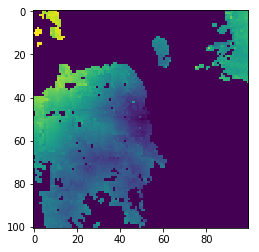

In [36]:
topo = np.flip(topo, 0)

plt.imshow(topo)

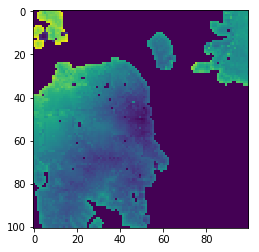

In [37]:
topo_plus_feet = np.flip(topo_plus_feet, 0)

plt.imshow(topo_plus_feet)

# interpolate

In [35]:
X = np.arange(min_x, max_x, 200)
Y = np.arange(min_y, max_y, 200)
X, Y = np.meshgrid(X, Y)

In [62]:
times = np.array([data['transit_time'] for node,data in G.nodes(data=True)])
points = np.array([(data['x'],data['y']) for node,data in G.nodes(data=True)])

In [81]:
from scipy.interpolate import griddata
Z = griddata(points, times, (X, Y), method='nearest')

In [ ]:
# plt.plot(points[:,0], points[:,1], '.')
plt.figure(figsize=(5,5))
plt.contour(X,Y,Z)

<a list of 12 text.Text objects>

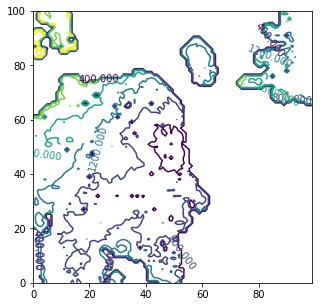

In [19]:
plt.figure(figsize=(5,5))
CS = plt.contour(topo_plus_feet)
plt.clabel(CS, inline=1, fontsize=10)

/Users/octavisemonin/anaconda3/envs/geo/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


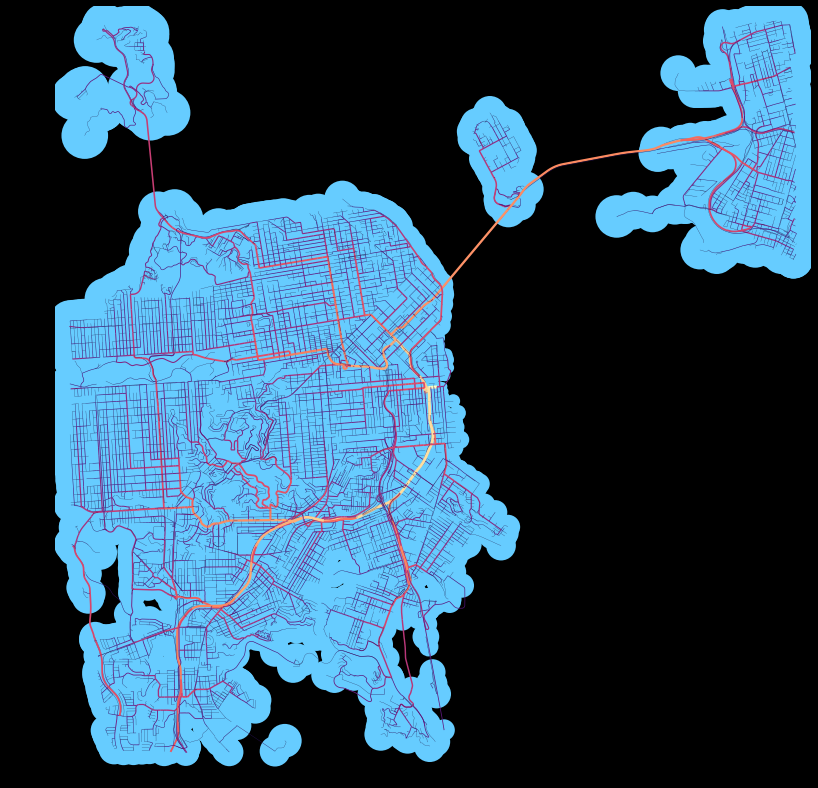

In [27]:
node_size = np.array([data['transit_time'] for n, data in G.nodes(data=True)])
fig, ax = ox.plot_graph(G, edge_color=edge_colors, edge_linewidth=edge_widths, equal_aspect=True, node_size=node_size, 
                        save=True, fig_height=14, fig_width=16, use_geom=True , close=False, show=False,  bgcolor='k')

# fig.savefig('test.png', facecolor=fig.get_facecolor(), dpi=300)
fig.show()